# Asia network demo
---

### Table of Contents

1. **Asia Network**  
   Definition and visualization of the classic Bayesian network used for demonstration.

2. **BIBAS Analysis**  
   Computation of node-to-node impact scores using BIBAS, with heatmaps, source ranking and graph visualizations.

3. **Extra Layouts Demonstration**  
   Visual comparison of different custom graph layouts added to the package.

---

## 1. Asia Network
The classic binary eight-node Asia (Lung cancer) Bayesian network models how a short trip to Asia, smoking, and respiratory diseases influence dyspnea and X-ray results.

### Nodes
- asia: patient visited Asia  
- smoke: patient is a smoker  
- tub: tuberculosis  
- lung: lung cancer  
- bronc: bronchitis  
- either: calculated variable, OR(tub, lung)  
- xray: abnormal chest X-ray  
- dysp: dyspnea (breathing difficulty)  


### Loading the classic 8-n|de Asia network

In [1]:
from pgmpy.utils import get_example_model
model = get_example_model("asia")

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


### plotting network structure

In [4]:
import networkx as nx                                  # needed for using plot_bn 
from bibas.visual_analysis import plot_bn
from bibas.extra_layouts import hierarchy_layout

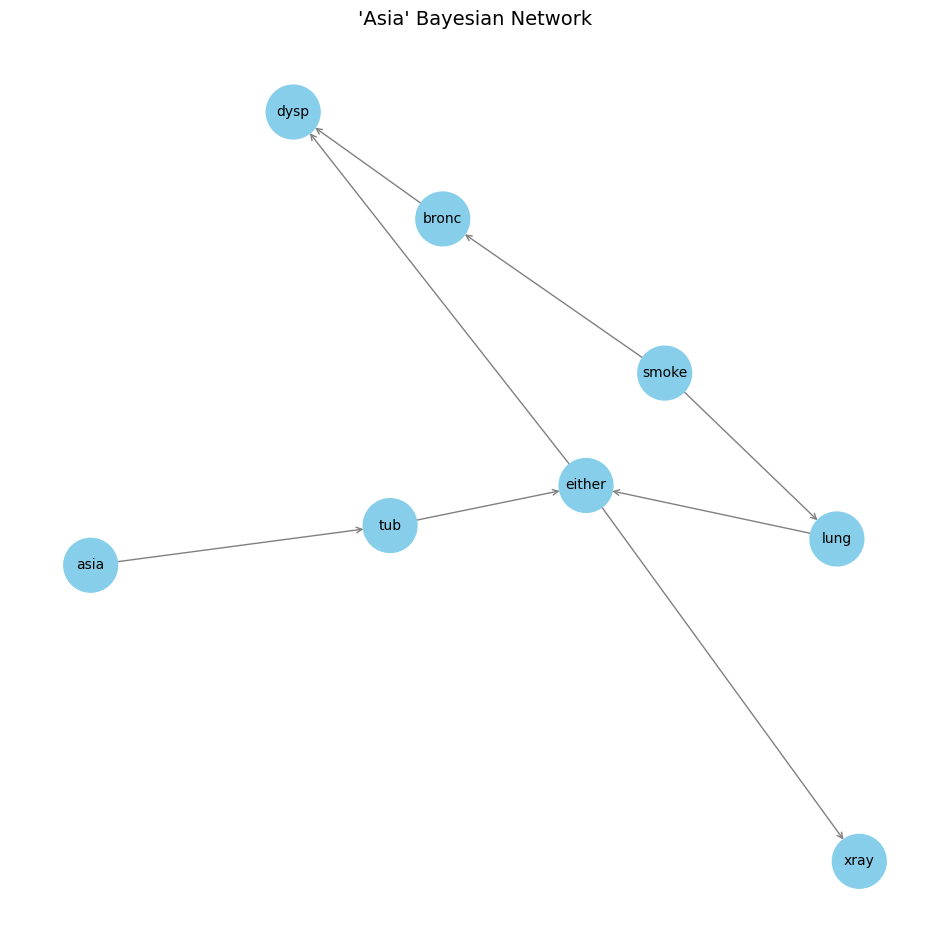

In [187]:
plot_bn(model, layout=nx.spring_layout, type="none", layout_kwargs={"seed": 15}, title = "'Asia' Bayesian Network")

---
## 2. BIBAS Analysis


### Key Functions:
- `compute_bibas_pairwise`
- `plot_binary_bibas_heatmap`
- `plot_ranked_sources_for_target`

#### Setting 'Dyspnea' as the outcome of interest

In [193]:
# target and state conventions
target = "dysp"       # Dyspnea
target_name = 'Dyspnea'
pos = "yes"           # “positive” state for Dyspnea

---
#### rank_sources_for_target
Prints BIBAS scores for each source (for either 'observe' or 'do' operations)

In [130]:
from bibas.inference_utils import compute_bibas_pairwise, rank_sources_for_target

In [136]:
for op in ["observe", "do"]:
    df = rank_sources_for_target(
        model,
        target=target,
        target_positive_state=pos,
        operation=op
    )
    print(f"\nOperation: {op.upper()} — ranking sources affecting '{target}'\n")
    print(df.to_string(index=False, formatters={"bibas_score": "{:.2f}".format}))



Operation: OBSERVE — ranking sources affecting 'dysp'

source bibas_score
 bronc       33.48
 smoke       11.68
either        4.86
  xray        4.52
  lung        4.16
   tub        0.74
  asia        0.03

Operation: DO — ranking sources affecting 'dysp'

source bibas_score
 bronc       33.01
 smoke       11.68
either        4.26
  lung        3.56
   tub        0.74
  asia        0.03
  xray        0.00


---
#### plot_ranked_sources_for_target
A dedicated function for calculating and plotting the same ranking

In [17]:
from bibas.visual_analysis import plot_ranked_sources_for_target

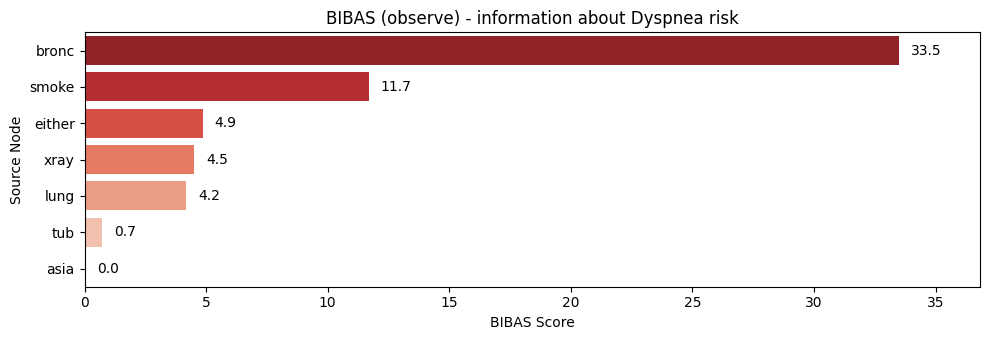

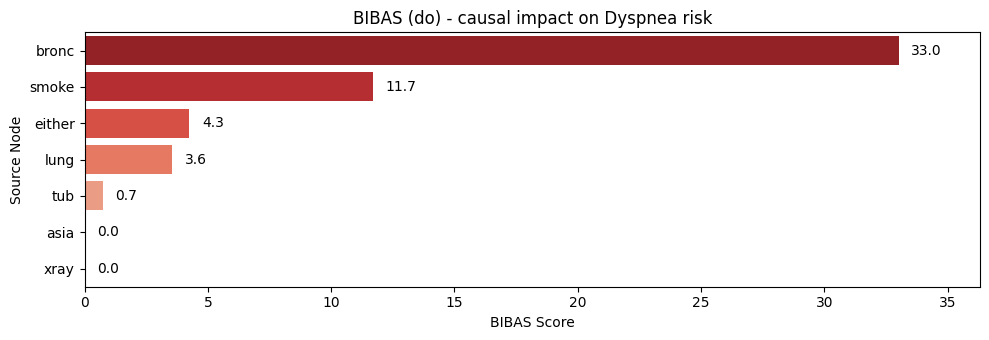

In [19]:
plot_ranked_sources_for_target(
    model,
    target=target,
    target_positive_state=pos,
    operation="observe",
    title="BIBAS (observe) - information about Dyspnea risk"
)

plot_ranked_sources_for_target(
    model,
    target=target,
    target_positive_state=pos,
    operation="do",
    title="BIBAS (do) - causal impact on Dyspnea risk"
)

---
#### plot_binary_bibas_heatmap
In binary BNs (e.g., all variables have but 2 states), we can compute and plot the score between each pair

Notice the differences between the 'do' and 'observe' operations (e.g. Xray has no effect but do have a predictive value)

In [23]:
from bibas.visual_analysis import plot_binary_bibas_heatmap

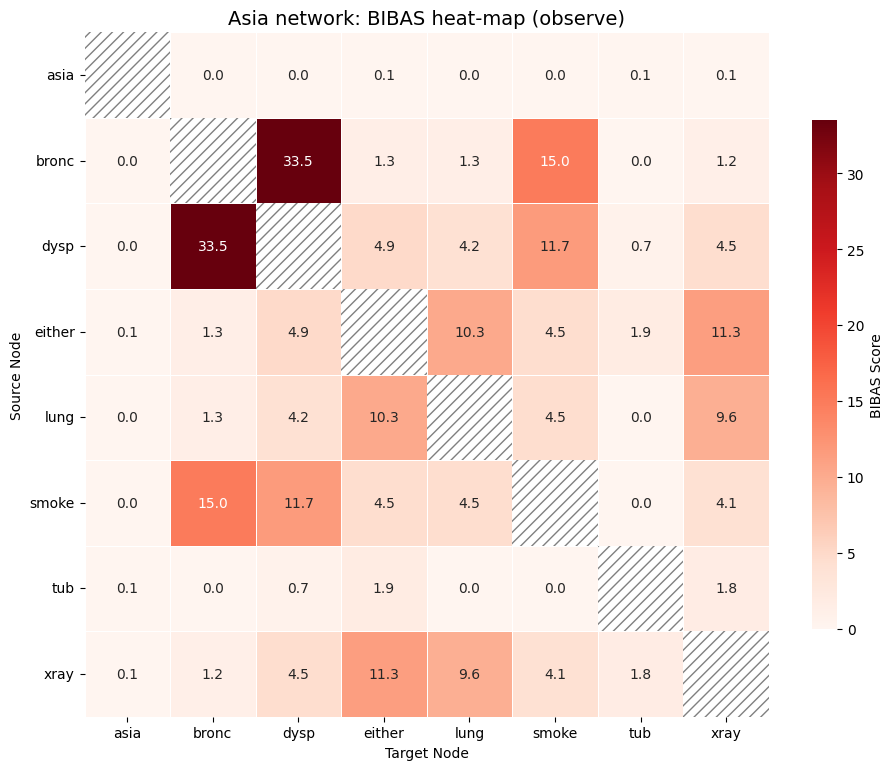

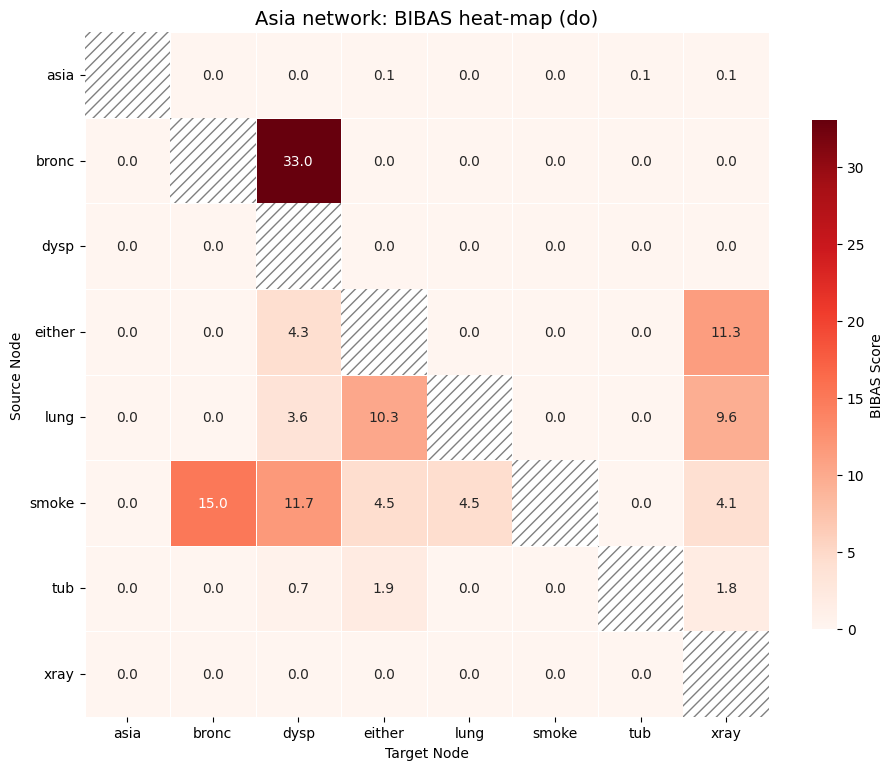

In [25]:
plot_binary_bibas_heatmap(
    model,
    operation="observe",
    title="Asia network: BIBAS heat-map (observe)"
)

plot_binary_bibas_heatmap(
    model,
    operation="do",
    title="Asia network: BIBAS heat-map (do)"
)

---
#### plot_bn
A function for visualizing BIBAS upon BN structures and layout handling

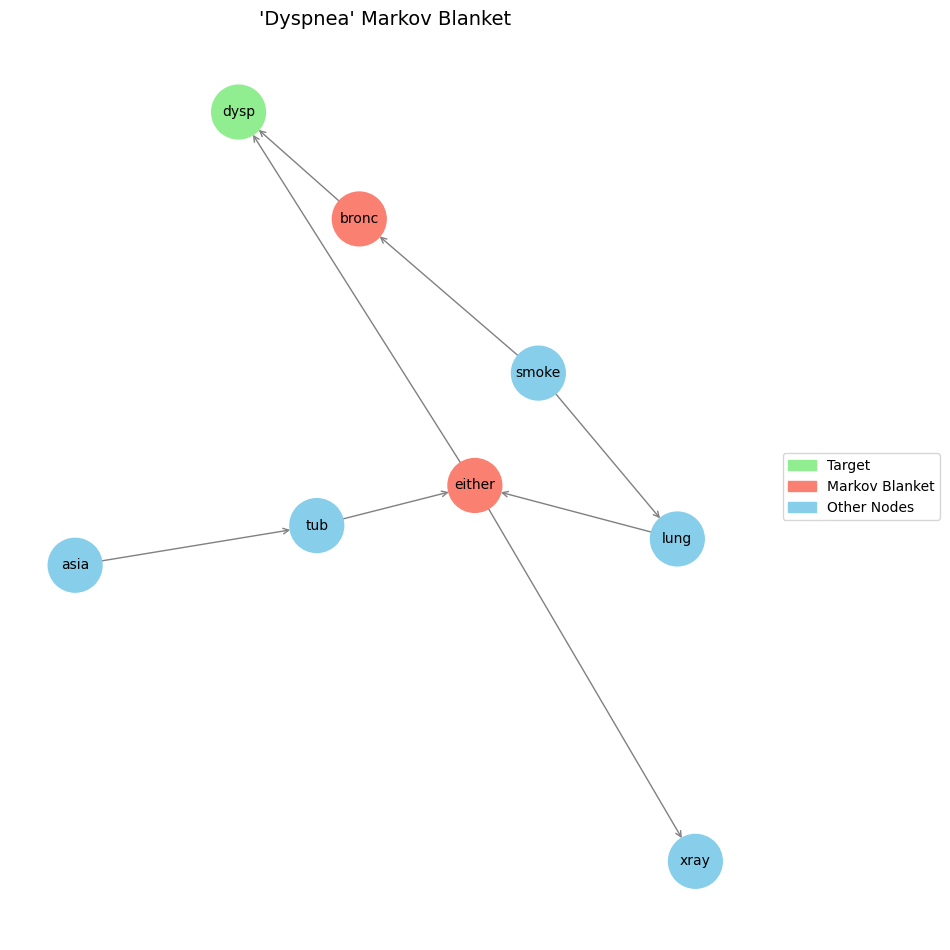

In [280]:
# 1. Markov blanket of Dyspnea
plot_bn(model, 
        layout=nx.spring_layout, 
        type="blanket", 
        target=target, 
        layout_kwargs={"seed": 15}, 
        title = f"'{target_name}' Markov Blanket"
       )

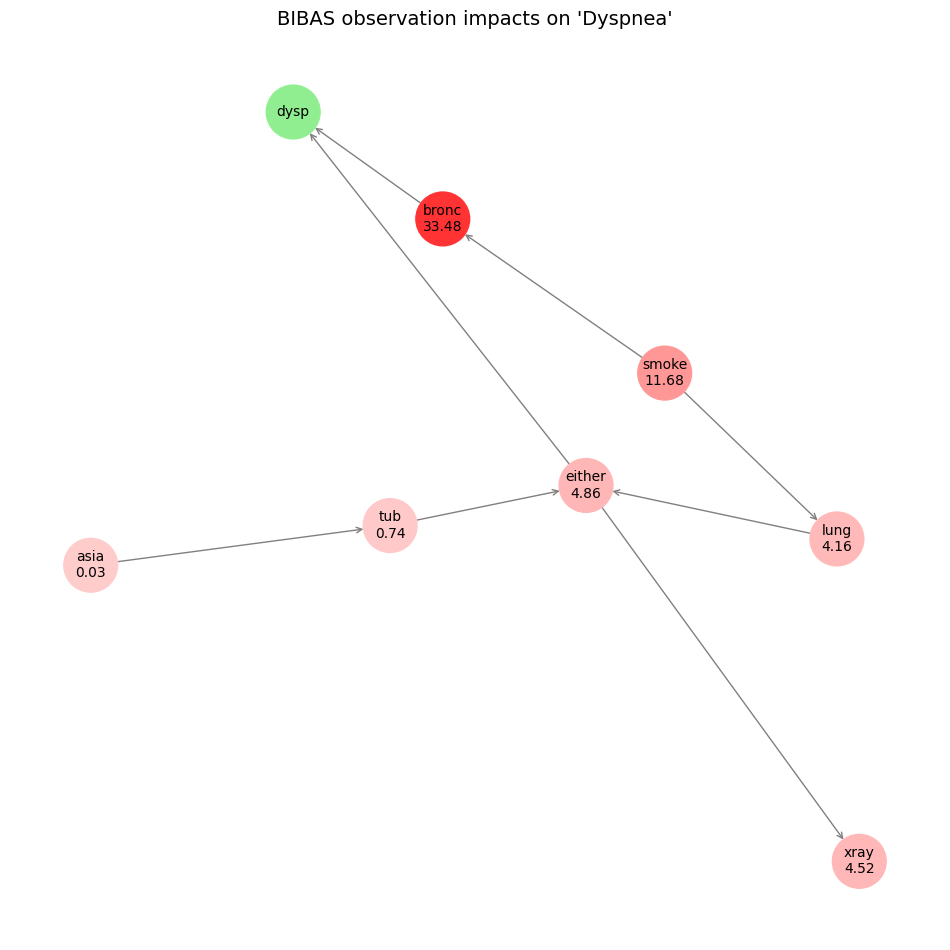

In [282]:
# 2. Node observation impacts on Dyspnea
plot_bn(model, layout=nx.spring_layout, 
        operation="observe", 
        type="impacts", 
        target=target, 
        layout_kwargs={"seed": 15}, 
        title = f"BIBAS observation impacts on '{target_name}'"
       )

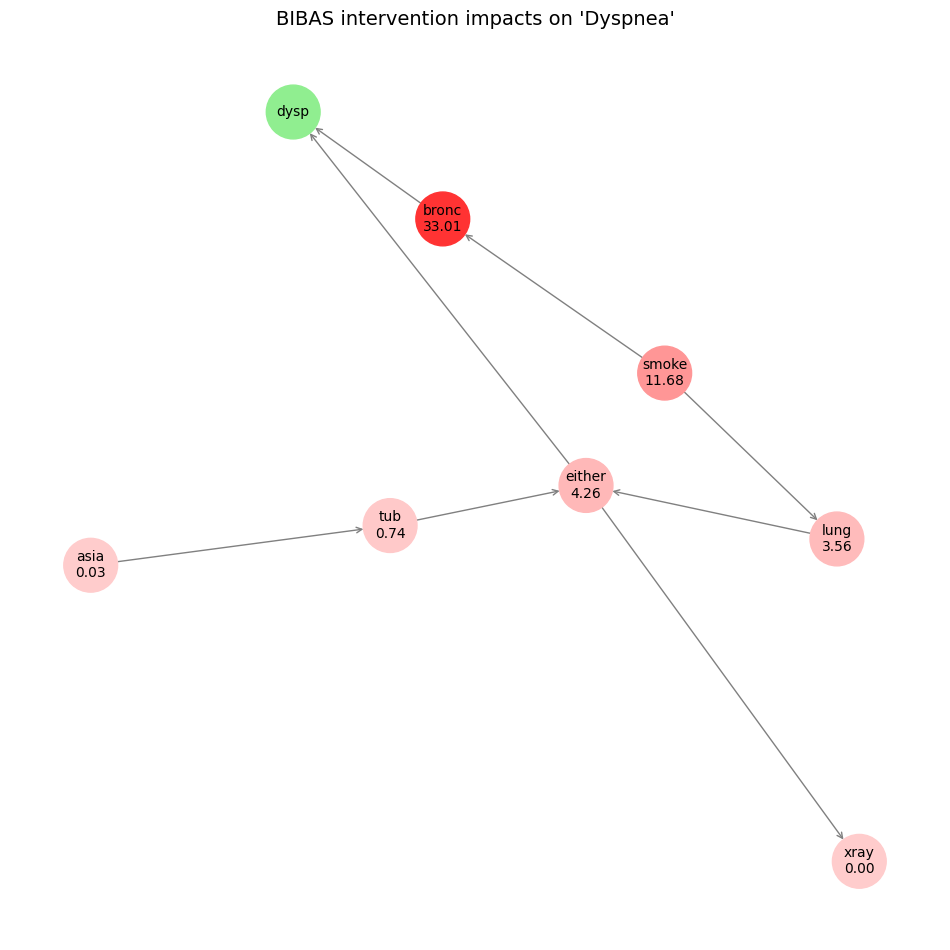

In [209]:
# 3. Node intervention impacts to Dyspnea
plot_bn(model, 
        layout=nx.spring_layout, 
        operation="do", 
        type="impacts", 
        target=target, 
        layout_kwargs={"seed": 15},
        title = f"BIBAS intervention impacts on '{target_name}'"
       )

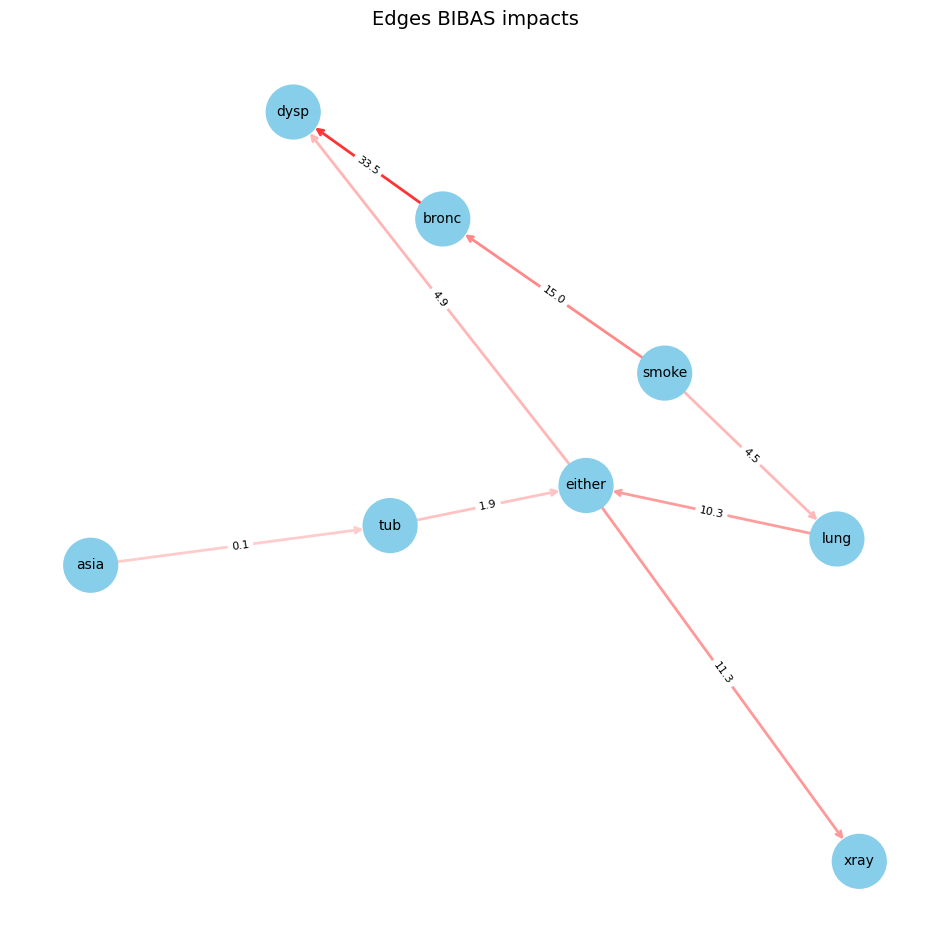

In [205]:
# 4. Edge impacts (must be a fully binary BN)
plot_bn(model, 
        layout=nx.spring_layout, 
        type="edges", 
        layout_kwargs={"seed": 15},
        title = f"Edges BIBAS impacts"
       )

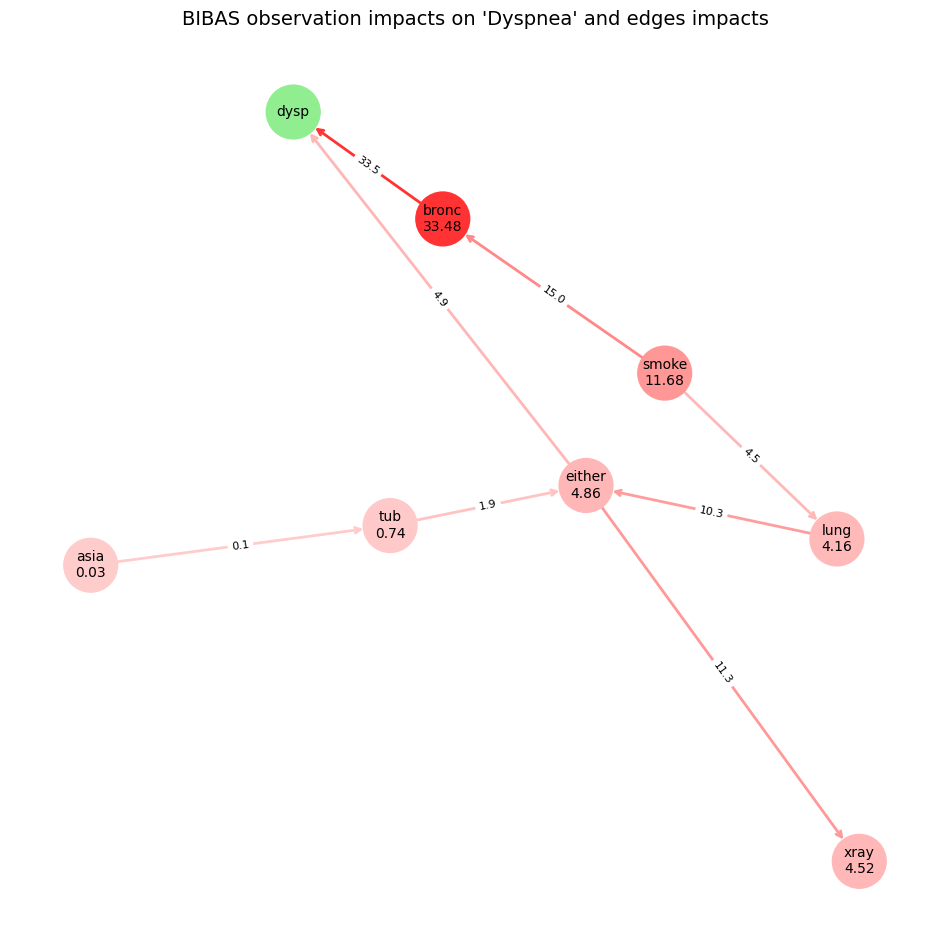

In [207]:
# 5. Node + edge impacts to Dyspnea
plot_bn(model, 
        layout=nx.spring_layout, 
        operation="observe", 
        type="edges_and_impacts", 
        target=target, 
        layout_kwargs={"seed": 15},
        title = f"BIBAS observation impacts on '{target_name}' and edges impacts"
       )

---
## 3. Extra Layouts Demonstration

### Extra Layouts Table

| Layout Name               | Description                                                                 | Orientation     | Use Case                            |
|--------------------------|-----------------------------------------------------------------------------|-----------------|--------------------------------------|
| Hierarchy Layout          | Top-down based on graph depth                                               | Vertical (↓)    | Emphasize generational structure     |
| Reversed Hierarchy Layout | Bottom-up layout, depth increases upward                                    | Vertical (↑)    | Interpret upward flow of influence   |
| Hierarchy Layout Jittered | Adds horizontal noise to reduce visual clutter in dense layers              | Vertical (↓)    | Enhance readability in crowded graphs|
| Radial Layout             | Circular, layer-by-layer from root nodes outward                            | Radial          | Highlight structural symmetry        |

---

#### Hierarchy Layout
A function for visualizing BIBAS upon BN structures and layout handling

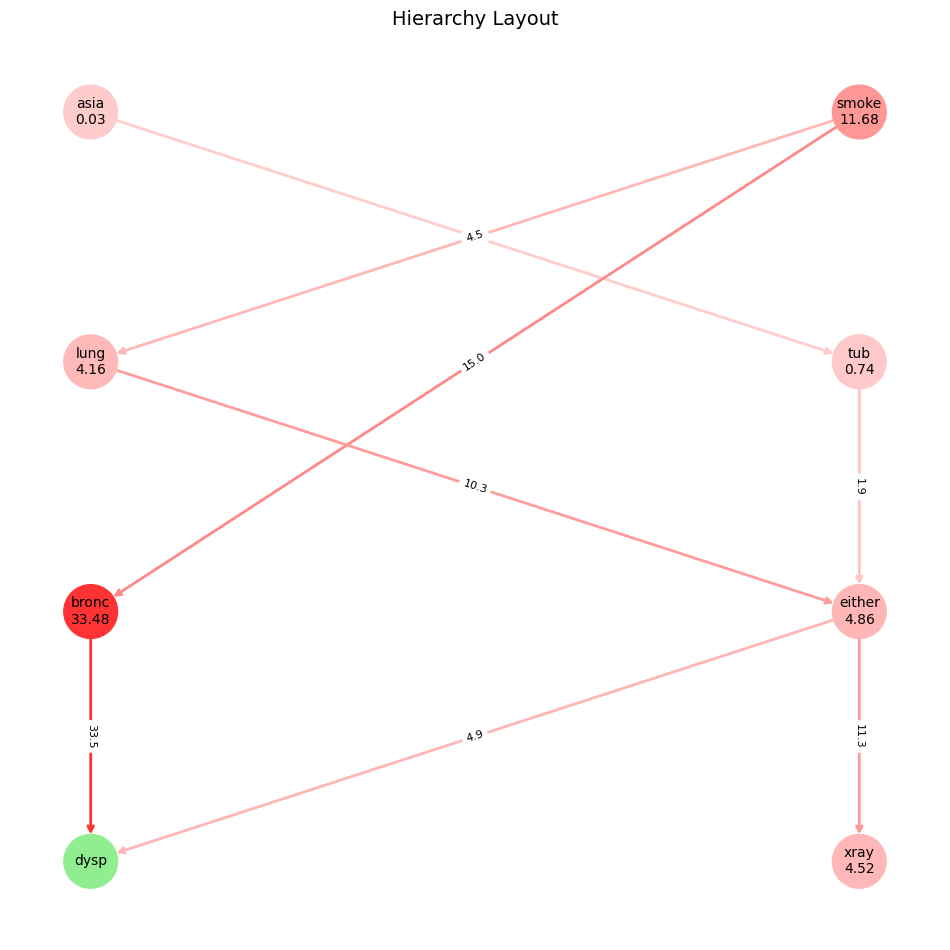

In [288]:
from bibas.extra_layouts import hierarchy_layout

plot_bn(model, 
        layout=hierarchy_layout,
        type="edges_and_impacts", 
        target = target, 
        title = 'Hierarchy Layout')

---
#### Hierarchy Layout Jittered
A variation of the standard hierarchical layout that introduces controlled horizontal jitter within each layer. This helps reduce edge overlaps and improve visual clarity while preserving the logical depth structure of the graph. The degree of jitter and reproducibility can be customized using the layout_kwargs parameters jitter_strength and seed.

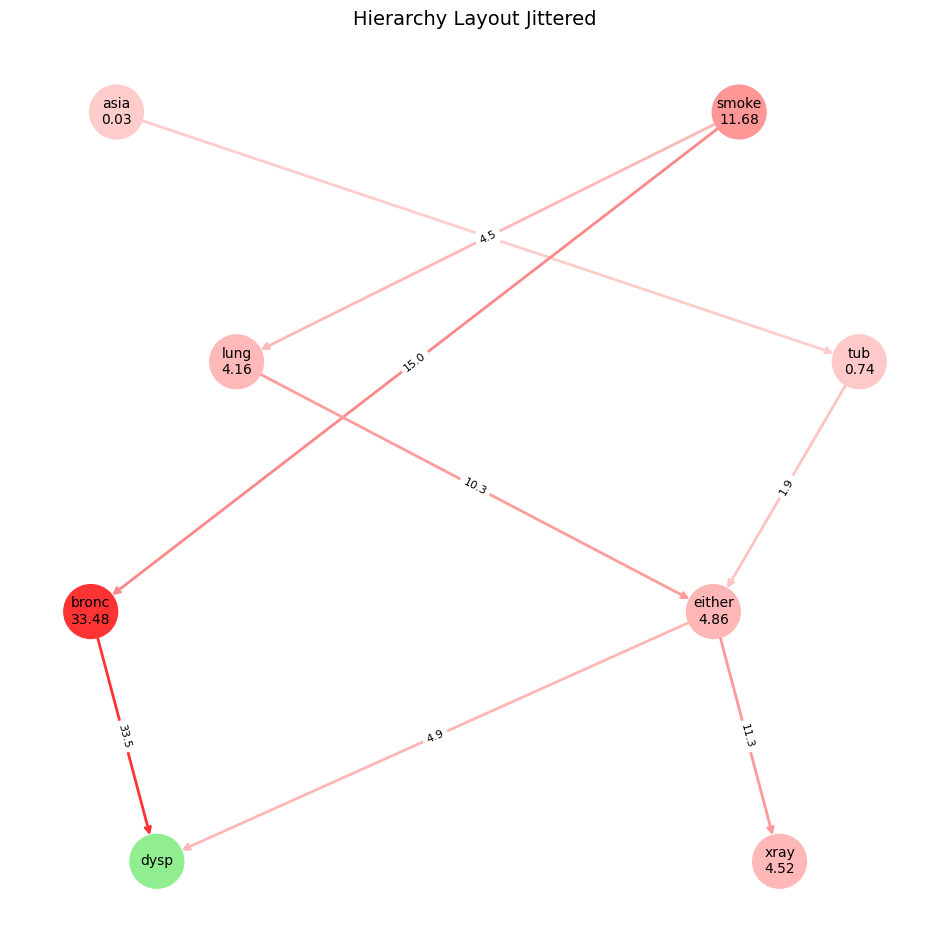

In [294]:
from bibas.extra_layouts import hierarchy_layout_jittered

plot_bn(model, 
       layout=hierarchy_layout_jittered, 
       layout_kwargs={"seed": 4, "jitter_strength": 0.4},
       type="edges_and_impacts", 
       target = target,
       title = "Hierarchy Layout Jittered"
      )

---
#### Reversed Hierarchy Layout
Similar to the hierarchy layout but rendered from bottom to top. Useful for emphasizing outcome-driven structures or tracing causality from effects back to sources.

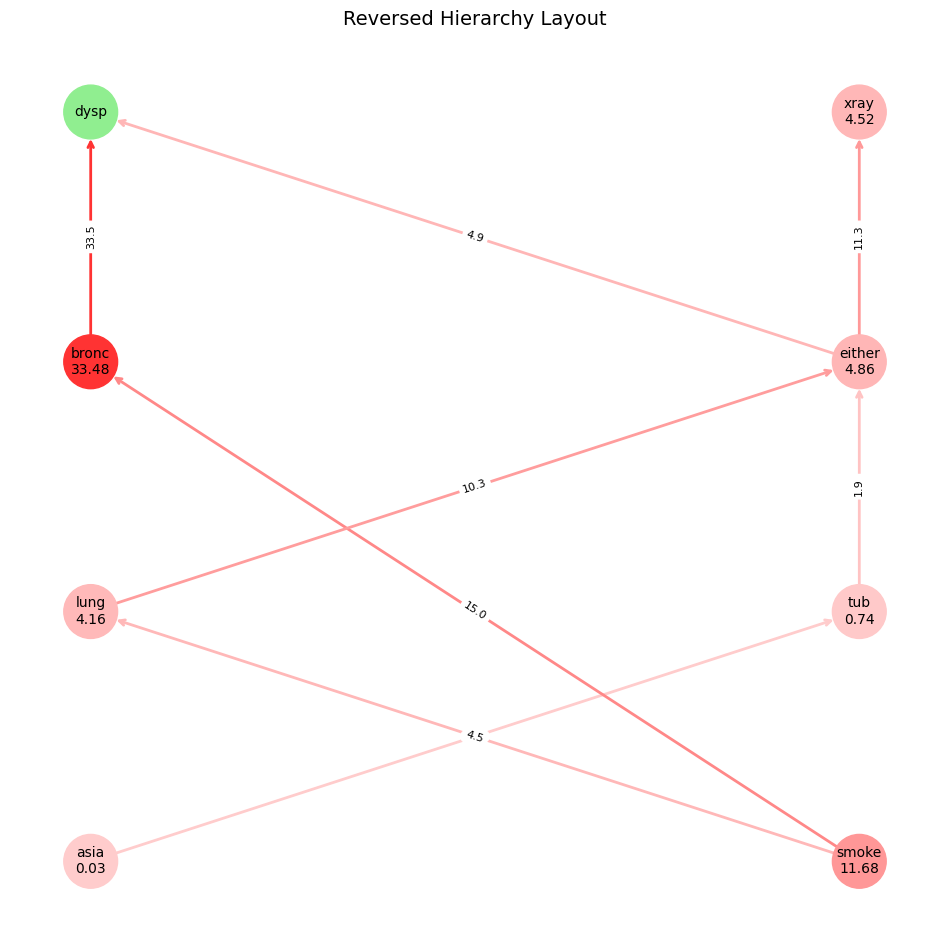

In [297]:
from bibas.extra_layouts import reversed_hierarchy_layout

plot_bn(model, 
        layout=reversed_hierarchy_layout,
        type="edges_and_impacts", 
        target = target,
        title = "Reversed Hierarchy Layout"
)